## Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm, chi2, multivariate_normal, wishart
from scipy.special import gammaln, digamma, polygamma
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
import pickle
import os
os.chdir('/Users/newuser/Desktop/RI/code/Heckman-Robit/Python')
from RobitSelection import RobitSelection

## Fit models and save results

In [2]:
rs =  RobitSelection()
rs.simulate_data(N=1000, error_type='gaussian')
rs.fit_robit(verbose=True, n_mcmc=5*10**4)
Gauss_MCMC_robit = rs.MCMC_robit
with open('/Users/newuser/Desktop/RI/code/files/Gauss_MCMC_robit.pkl', 'wb') as file:  # 'wb' stands for write binary
    pickle.dump(Gauss_MCMC_robit, file)

rs =  RobitSelection()
rs.simulate_data(N=1000, error_type='t')
rs.fit_robit(verbose=True, n_mcmc=5*10**4)
t_MCMC_robit = rs.MCMC_robit
with open('/Users/newuser/Desktop/RI/code/files/t_MCMC_robit.pkl', 'wb') as file:  # 'wb' stands for write binary
    pickle.dump(t_MCMC_robit, file)

## Plot Results

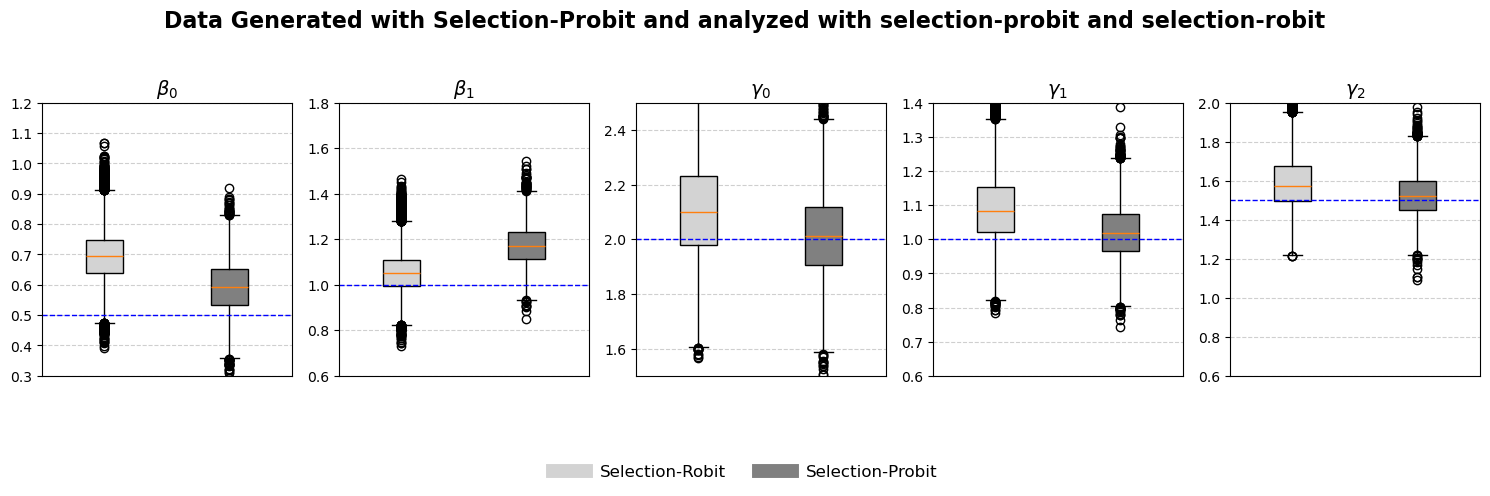

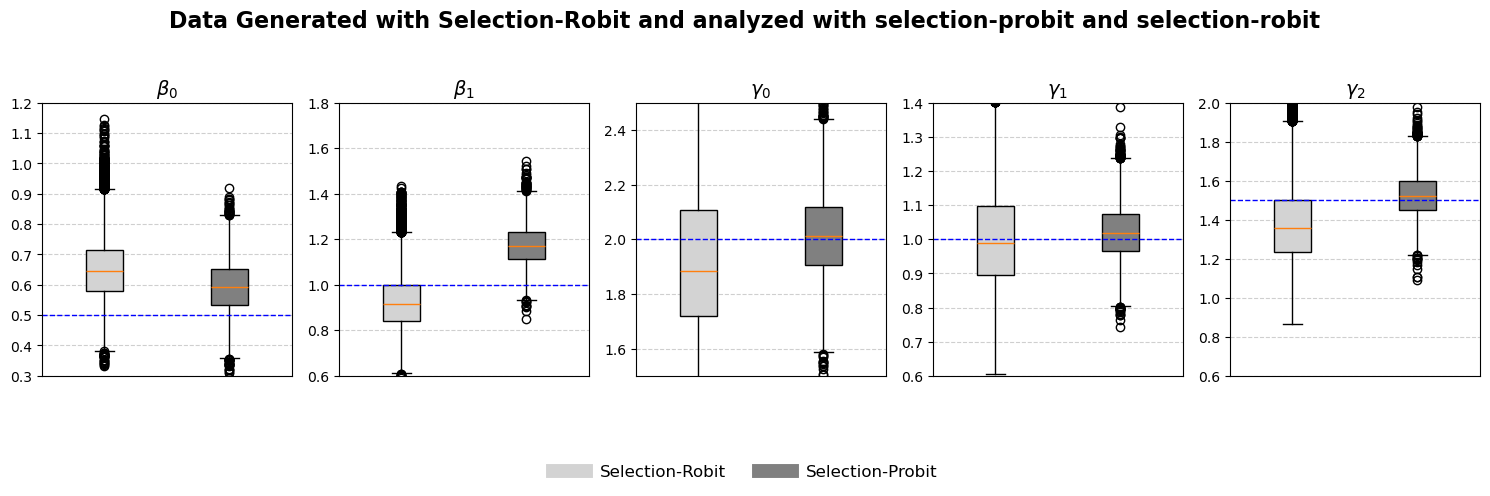

In [3]:
def plot_parameters(probit_fit, robit_fit, title):
     
     # First 10^4 draws discarded as burn in period
     
     beta0_group1 = robit_fit.get('DELTA_mcmc')[10000:,0]
     beta0_group2 = probit_fit['beta[1]'].to_numpy() 
     
     beta1_group1 = robit_fit.get('DELTA_mcmc')[10000:,1]
     beta1_group2 = probit_fit['beta[2]'].to_numpy() 
     
     gamma0_group1 = robit_fit.get('DELTA_mcmc')[10000:,2]
     gamma0_group2 = probit_fit['gamma[1]'].to_numpy() 
     
     gamma1_group1 = robit_fit.get('DELTA_mcmc')[10000:,3]
     gamma1_group2 = probit_fit['gamma[2]'].to_numpy() 
     
     gamma2_group1 = robit_fit.get('DELTA_mcmc')[10000:,4]
     gamma2_group2 = probit_fit['gamma[3]'].to_numpy() 
     

     rho_group1 = robit_fit.get('OMEGA_mcmc')[10000:,2]
     rho_group2 = probit_fit['rho'].to_numpy() 
     nu_group1 = robit_fit.get('NU_mcmc')[10000:]


     # Organizing the data into a list
     data = [
         (beta0_group1, beta0_group2, r'$\beta_0$', (0.3, 1.2), 0.5),
         (beta1_group1, beta1_group2, r'$\beta_1$', (0.6, 1.8), 1.0),
         (gamma0_group1, gamma0_group2, r'$\gamma_0$', (1.5, 2.5), 2.0),
         (gamma1_group1, gamma1_group2, r'$\gamma_1$', (0.6, 1.4), 1.0),
         (gamma2_group1, gamma2_group2, r'$\gamma_2$', (0.6, 2.0), 1.5),
        # (rho_group1, rho_group2, r'$\rho$', (0.0, 0.5), 0.32),
        # (nu_group1, nu_group1, r'$\nu$', (0, 60), 0)
     ]
     
     # Setting up the grid layout
     fig, axes = plt.subplots(1, len(data), figsize=(15, 5), sharey=False)
     fig.suptitle(title, fontsize=16, weight='bold')
     
     # Colors for the groups
     colors = ['lightgray', 'gray']
     
     # Creating individual boxplots for each parameter
     for ax, (group1, group2, label, ylim, line_value) in zip(axes, data):
         bplot = ax.boxplot(
             [group1, group2], patch_artist=True, widths=0.3
         )
         
         # Customizing colors for box plots
         for patch, color in zip(bplot['boxes'], colors):
             patch.set_facecolor(color)
         
         # Customizing each subplot
         ax.set_title(label, fontsize=14)
         ax.axhline(y=line_value, color='blue', linestyle='--', linewidth=1.0)  # Blue reference line
         ax.set_xticks([])  # Remove x-axis labels
         ax.set_ylim(ylim)
         ax.grid(axis='y', linestyle='--', alpha=0.6)
     
     # Adding a legend for the groups
     fig.legend(
         handles=[
             plt.Line2D([0], [0], color='lightgray', lw=10, label='Selection-Robit'),
             plt.Line2D([0], [0], color='gray', lw=10, label='Selection-Probit')
         ],
         loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=2, fontsize=12, frameon=False
     )
     
     plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust layout to fit title and legend
     plt.show()

# Get data from Gaussian sim

robit_fit = pd.read_pickle('/Users/newuser/Desktop/RI/code/files/Gauss_MCMC_robit.pkl')
probit_fit = pd.read_csv('/Users/newuser/Desktop/RI/code/files/probit_gaussian.csv') # from R (see ProbitSelection.R)

plot_parameters(probit_fit, robit_fit, 
                title="Data Generated with Selection-Probit and analyzed with selection-probit and selection-robit")

# Get data from t-sim

robit_fit = pd.read_pickle('/Users/newuser/Desktop/RI/code/files/t_MCMC_robit.pkl')
probit_fit = pd.read_csv('/Users/newuser/Desktop/RI/code/files/probit_t.csv')

plot_parameters(probit_fit, robit_fit, 
                title="Data Generated with Selection-Robit and analyzed with selection-probit and selection-robit")